# NFL Game Analysis

<img src='nfl_logo.png' style='width:200px;height:240px'/>

## Import dependencies

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import math

path = 'C:/Users/OYO/Desktop/NFL_Folder'
os.chdir(path)

## Dataset Description

In [2]:
nfl = pd.read_csv('nfl_play.csv',low_memory=False)
players = pd.read_csv('players.csv', low_memory = False)

In [3]:
nfl.head()

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,...,penalty_player_id,penalty_player_name,penalty_yards,replay_or_challenge,replay_or_challenge_result,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
0,46,2009091000,PIT,TEN,PIT,home,TEN,TEN,30.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
1,68,2009091000,PIT,TEN,PIT,home,TEN,PIT,58.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
2,92,2009091000,PIT,TEN,PIT,home,TEN,PIT,53.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
3,113,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
4,139,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0


In [4]:
players.shape

(1713, 10)

In [5]:
nfl.shape

(449371, 255)

In [6]:
print(nfl.columns)

Index(['play_id', 'game_id', 'home_team', 'away_team', 'posteam',
       'posteam_type', 'defteam', 'side_of_field', 'yardline_100', 'game_date',
       ...
       'penalty_player_id', 'penalty_player_name', 'penalty_yards',
       'replay_or_challenge', 'replay_or_challenge_result', 'penalty_type',
       'defensive_two_point_attempt', 'defensive_two_point_conv',
       'defensive_extra_point_attempt', 'defensive_extra_point_conv'],
      dtype='object', length=255)


In [7]:
print(players.columns)

Index(['nflId', 'FirstName', 'LastName', 'PositionAbbr', 'EntryYear',
       'DraftRound', 'DraftNumber', 'Height', 'Weight', 'College'],
      dtype='object')


**Before we dive deep into analysis, we must get a little better understanding of the game. American Football as we know it is played extensively in US with two major divisions AFC and NFC. There are a total of 32 teams that compete among each others to win the Finale Event called SuperBowl. Each team has three set of teams - Offensive, Defensive and Special Teams. At any moment of time in the game a maximum of 11 players are allowed on the field.**




## Teams in NFL

![](first8.png)

![](second8.png)

![](third8.png)

![](last8.png)

## Team Names Short Codes

In [11]:
# Getting only the relevant columns required for model building and fitting

down_conv = nfl[['game_id','posteam','defteam','drive','down','qtr','yardline_100','quarter_seconds_remaining','half_seconds_remaining','game_seconds_remaining','fourth_down_converted','third_down_converted','play_type']]
down_conv

,game_id,posteam,defteam,drive,down,qtr,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,fourth_down_converted,third_down_converted,play_type
0,2009091000,PIT,TEN,1,NaN,1,30.0,900.0,1800.0,3600.0,0.0,0.0,kickoff
1,2009091000,PIT,TEN,1,1.0,1,58.0,893.0,1793.0,3593.0,0.0,0.0,pass
2,2009091000,PIT,TEN,1,2.0,1,53.0,856.0,1756.0,3556.0,0.0,0.0,run
3,2009091000,PIT,TEN,1,3.0,1,56.0,815.0,1715.0,3515.0,0.0,0.0,pass
4,2009091000,PIT,TEN,1,4.0,1,56.0,807.0,1707.0,3507.0,0.0,0.0,punt
...,...,...,...,...,...,...,...,...,...,...,...,...,...
449366,2018121700,CAR,NO,20,2.0,4,66.0,63.0,63.0,63.0,0.0,0.0,pass
449367,2018121700,CAR,NO,20,3.0,4,66.0,58.0,58.0,58.0,0.0,0.0,pass
449368,2018121700,CAR,NO,20,4.0,4,61.0,38.0,38.0,38.0,0.0,0.0,pass
449369,2018121700,NO,CAR,21,1.0,4,39.0,35.0,35.0,35.0,0.0,0.0,qb_kneel


In [12]:
# Filtering based on the condition that the throw must be a pass or run and the down must be fourth.

down_conv = down_conv[((down_conv['play_type']=='pass') | (down_conv['play_type']=='run')) & (down_conv['down']==4.0)]
down_conv.head()

,game_id,posteam,defteam,drive,down,qtr,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,fourth_down_converted,third_down_converted,play_type
329,2009091304,CLE,MIN,22,4.0,4,64.0,292.0,292.0,292.0,0.0,0.0,pass
395,2009091307,DET,NO,8,4.0,2,4.0,851.0,851.0,2651.0,1.0,0.0,run
516,2009091307,DET,NO,25,4.0,4,64.0,378.0,378.0,378.0,1.0,0.0,pass
676,2009091308,TB,DAL,19,4.0,4,26.0,464.0,464.0,464.0,0.0,0.0,pass
697,2009091308,TB,DAL,21,4.0,4,2.0,91.0,91.0,91.0,1.0,0.0,pass


In [13]:
# Getting count of the dataset

down_conv['play_type'].value_counts()

pass    3006
run     1715
Name: play_type, dtype: int64

## Data cleaning and Pre-processing

In [14]:
#The required columns for the building of model

In [15]:
model_data = down_conv[['posteam','defteam','drive','qtr','yardline_100','quarter_seconds_remaining','half_seconds_remaining',
                       'game_seconds_remaining','play_type','fourth_down_converted']]
model_data.head(10)

,posteam,defteam,drive,qtr,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,play_type,fourth_down_converted
329,CLE,MIN,22,4,64.0,292.0,292.0,292.0,pass,0.0
395,DET,NO,8,2,4.0,851.0,851.0,2651.0,run,1.0
516,DET,NO,25,4,64.0,378.0,378.0,378.0,pass,1.0
676,TB,DAL,19,4,26.0,464.0,464.0,464.0,pass,0.0
697,TB,DAL,21,4,2.0,91.0,91.0,91.0,pass,1.0
783,NYJ,HOU,10,2,43.0,2.0,2.0,1802.0,pass,1.0
813,HOU,NYJ,14,3,51.0,217.0,1117.0,1117.0,pass,0.0
860,NYJ,HOU,20,4,29.0,120.0,120.0,120.0,run,1.0
942,IND,JAC,7,2,54.0,8.0,8.0,1808.0,pass,0.0
995,JAC,IND,15,4,7.0,672.0,672.0,672.0,run,1.0


In [16]:
# Checking for null values in the dataset

model_data.isnull().sum()

posteam                      0
defteam                      0
drive                        0
qtr                          0
yardline_100                 0
quarter_seconds_remaining    0
half_seconds_remaining       0
game_seconds_remaining       0
play_type                    0
fourth_down_converted        0
dtype: int64

In [17]:
# Label encoding the posteam and defteam and play_type

from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
pos_team = label.fit_transform(model_data['posteam'])
def_team = label.fit_transform(model_data['defteam'])
play_type = label.fit_transform(model_data['play_type'])
model_data['def_team'] = def_team
model_data['pos_team'] = pos_team
model_data['play_type'] = play_type

C:\Users\OYO\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\OYO\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\OYO\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [18]:
model_data.drop(['posteam','defteam'],axis=1, inplace=True)
model_data.head()

C:\Users\OYO\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,drive,qtr,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,play_type,fourth_down_converted,def_team,pos_team
329,22,4,64.0,292.0,292.0,292.0,0,0.0,20,7
395,8,2,4.0,851.0,851.0,2651.0,1,1.0,22,10
516,25,4,64.0,378.0,378.0,378.0,0,1.0,22,10
676,19,4,26.0,464.0,464.0,464.0,0,0.0,8,32
697,21,4,2.0,91.0,91.0,91.0,0,1.0,8,32


In [16]:
# Scaling the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

model_data[['pos_team','def_team','drive','qtr','yardline_100','quarter_seconds_remaining','half_seconds_remaining',
                       'game_seconds_remaining','play_type']] = scaler.fit_transform(model_data[['pos_team','def_team','drive','qtr','yardline_100','quarter_seconds_remaining','half_seconds_remaining',
                       'game_seconds_remaining','play_type']])
model_data.head()

C:\Users\OYO\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\OYO\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,drive,qtr,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,play_type,fourth_down_converted,def_team,pos_team
329,0.813288,0.735019,1.263296,-0.124215,-0.512052,-0.720466,-0.755331,0.0,0.314693,-0.942742
395,-1.106273,-1.121602,-1.461888,2.043527,0.610105,1.541124,1.323922,1.0,0.508822,-0.654597
516,1.224623,0.735019,1.263296,0.209284,-0.339413,-0.638018,-0.755331,1.0,0.508822,-0.654597
676,0.401954,0.735019,-0.462654,0.542783,-0.166773,-0.555569,-0.755331,0.0,-0.850079,1.458464
697,0.676177,0.735019,-1.552728,-0.903671,-0.915547,-0.913167,-0.755331,1.0,-0.850079,1.458464


In [19]:
# Checking correlation 

model_data.corr()

,drive,qtr,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,play_type,fourth_down_converted,def_team,pos_team
drive,1.000000,0.903774,0.193816,-0.381630,-0.594505,-0.925895,-0.320739,-0.155268,-0.026479,0.011447
qtr,0.903774,1.000000,0.150194,-0.192813,-0.545880,-0.966194,-0.305861,-0.144263,-0.027312,0.011550
yardline_100,0.193816,0.150194,1.000000,-0.126093,-0.144653,-0.167592,-0.115750,-0.022847,-0.028496,0.007269
quarter_seconds_remaining,-0.381630,-0.192813,-0.126093,1.000000,0.637004,0.428591,0.207151,0.108667,0.032296,0.000221
half_seconds_remaining,-0.594505,-0.545880,-0.144653,0.637004,1.000000,0.663030,0.288636,0.143952,0.020889,-0.016312
game_seconds_remaining,-0.925895,-0.966194,-0.167592,0.428591,0.663030,1.000000,0.335471,0.160285,0.034501,-0.010863
play_type,-0.320739,-0.305861,-0.115750,0.207151,0.288636,0.335471,1.000000,0.205841,0.027839,-0.012658
fourth_down_converted,-0.155268,-0.144263,-0.022847,0.108667,0.143952,0.160285,0.205841,1.000000,-0.019120,-0.005011
def_team,-0.026479,-0.027312,-0.028496,0.032296,0.020889,0.034501,0.027839,-0.019120,1.000000,-0.050912
pos_team,0.011447,0.011550,0.007269,0.000221,-0.016312,-0.010863,-0.012658,-0.005011,-0.050912,1.000000


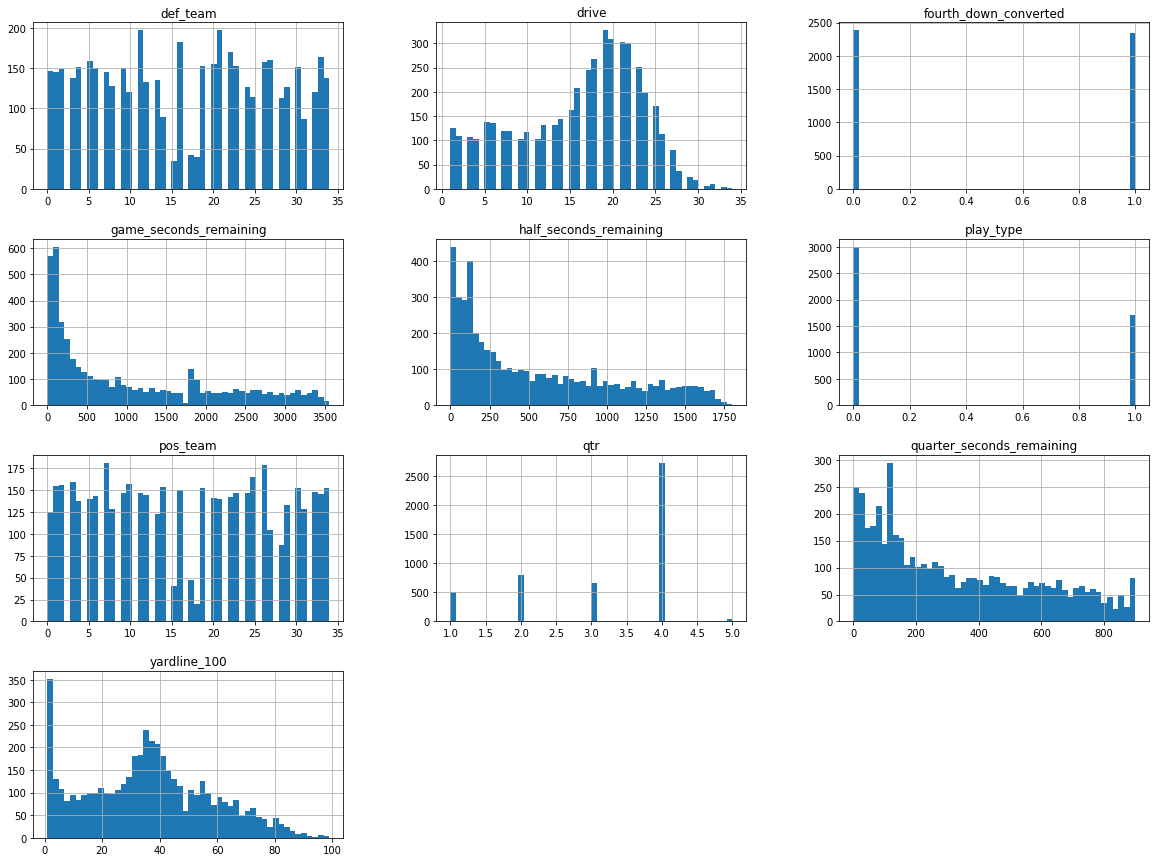

In [20]:
# Plot a histogram to look at the type of data we are dealing with.

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

model_data.hist(bins=50, figsize = (20,15))
plt.show()


In [21]:
# Getting the target and features

X = model_data.drop('fourth_down_converted', axis = 1)
y = model_data['fourth_down_converted']

In [22]:
# Dividing the dataset into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

## Model Selection and model fitting

### Support Vector Classifier

In [23]:
from sklearn.svm import SVC
clf_svm = SVC(random_state=42,kernel='linear')
clf_svm.fit(X_train, y_train)

y_pred_svm = clf_svm.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_svm)

0.6222222222222222

### KNN Classifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=13)
clf_knn.fit(X_train, y_train)

y_pred_knn = clf_knn.predict(X_test)
accuracy_score(y_test, y_pred_knn)

0.5216931216931217

### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(random_state=42, max_iter=100)
clf_lr.fit(X_train,y_train)

y_pred_lr = clf_lr.predict(X_test)
accuracy_score(y_test, y_pred_lr)

C:\Users\OYO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6296296296296297

### Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(random_state=42)
clf_tree.fit(X_train, y_train)

y_pred_tree = clf_tree.predict(X_test)
accuracy_score(y_test, y_pred_tree)

0.5428571428571428

### Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=300)
clf_rf.fit(X_train, y_train)

y_pred_rf = clf_rf.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.5978835978835979

### Adaboost Classifier

In [28]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(n_estimators=100)
ab.fit(X_train, y_train)

y_pred_ab = ab.predict(X_test)
accuracy_score(y_test, y_pred_ab)

0.6095238095238096

### Using Cross Validation

In [30]:
#Scaling the train and test set and applying on Logistic Regression

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train2 = scalar.fit_transform(X_train)
X_test2 = scalar.fit_transform(X_test)

clf_lr2 = LogisticRegression(random_state=42, max_iter=100)
clf_lr2.fit(X_train2,y_train)
y_pred_lr2 = clf_lr2.predict(X_test2)
accuracy_score(y_test, y_pred_lr2)

C:\Users\OYO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6306878306878307

In [31]:
from sklearn.model_selection import cross_val_score
lr_scores = cross_val_score(clf_lr, X_train, y_train, cv=4)
lr2_scores = cross_val_score(clf_lr2, X_train2, y_train, cv=4)
print(lr_scores.mean())
print(lr2_scores.mean())

0.5972055300263147
0.597470080290865


C:\Users\OYO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\OYO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\OYO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\OYO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\OYO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

## Restarting

### Selecting the relevant columns

In [51]:
data = nfl[['posteam','defteam','qtr','yardline_100','quarter_seconds_remaining','half_seconds_remaining',
                       'posteam_score','defteam_score','no_score_prob','td_prob',
           'touchdown','fourth_down_converted','down']]
data.head()

,posteam,defteam,qtr,yardline_100,quarter_seconds_remaining,half_seconds_remaining,posteam_score,defteam_score,no_score_prob,td_prob,touchdown,fourth_down_converted,down
0,PIT,TEN,1,30.0,900.0,1800.0,NaN,NaN,0.001506,0.313676,0.0,0.0,NaN
1,PIT,TEN,1,58.0,893.0,1793.0,0.0,0.0,0.000969,0.423011,0.0,0.0,1.0
2,PIT,TEN,1,53.0,856.0,1756.0,0.0,0.0,0.001057,0.421478,0.0,0.0,2.0
3,PIT,TEN,1,56.0,815.0,1715.0,0.0,0.0,0.001434,0.318621,0.0,0.0,3.0
4,PIT,TEN,1,56.0,807.0,1707.0,0.0,0.0,0.001861,0.208111,0.0,0.0,4.0


In [52]:
data = data[(data['down'] == 4.0)]
data.shape

(39644, 13)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39644 entries, 4 to 449368
Data columns (total 13 columns):
posteam                      39525 non-null object
defteam                      39525 non-null object
qtr                          39644 non-null int64
yardline_100                 39525 non-null float64
quarter_seconds_remaining    39644 non-null float64
half_seconds_remaining       39642 non-null float64
posteam_score                39525 non-null float64
defteam_score                39525 non-null float64
no_score_prob                39644 non-null float64
td_prob                      39644 non-null float64
touchdown                    39525 non-null float64
fourth_down_converted        39525 non-null float64
down                         39644 non-null float64
dtypes: float64(10), int64(1), object(2)
memory usage: 4.2+ MB


In [54]:
data.isnull().sum()

posteam                      119
defteam                      119
qtr                            0
yardline_100                 119
quarter_seconds_remaining      0
half_seconds_remaining         2
posteam_score                119
defteam_score                119
no_score_prob                  0
td_prob                        0
touchdown                    119
fourth_down_converted        119
down                           0
dtype: int64

In [55]:
data.dropna(how='any',inplace=True)
data.shape

(39523, 13)

#### Label Encoding

In [56]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
pos_team = label.fit_transform(data['posteam'])
def_team = label.fit_transform(data['defteam'])

data['pos_team'] = pos_team
data['def_team'] = def_team

In [57]:
#Dropping the categorical columns with string datatype

data.drop(['posteam','defteam'],axis=1,inplace=True)

#### Scaling using StandardScaler

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['yardline_100','quarter_seconds_remaining','half_seconds_remaining',
                       'posteam_score','defteam_score']] = scaler.fit_transform(data[['yardline_100','quarter_seconds_remaining','half_seconds_remaining',
                       'posteam_score','defteam_score']])
data.head()

,qtr,yardline_100,quarter_seconds_remaining,half_seconds_remaining,posteam_score,defteam_score,no_score_prob,td_prob,touchdown,fourth_down_converted,down,pos_team,def_team
4,1,0.210318,1.482393,1.709710,-1.052662,-1.138157,0.001861,0.208111,0.0,0.0,4.0,27,33
8,1,1.804706,1.055167,1.495628,-1.052662,-1.138157,0.003023,0.135991,0.0,0.0,4.0,33,27
14,1,-0.387578,0.340603,1.137561,-1.052662,-1.138157,0.004547,0.150286,0.0,0.0,4.0,27,33
20,1,-1.264491,-0.026131,0.953792,-1.052662,-1.138157,0.001197,0.028760,0.0,0.0,4.0,33,27
24,1,1.127091,-0.426892,0.752971,-1.052662,-1.138157,0.015674,0.157581,0.0,0.0,4.0,27,33


In [59]:
data['touchdown'] = data['touchdown'].astype('int')
#data['complete_pass'] = data['complete_pass'].astype('int')
data['fourth_down_converted'] = data['fourth_down_converted'].astype('int')
data.drop('down',axis=1,inplace=True)
data.head()

,qtr,yardline_100,quarter_seconds_remaining,half_seconds_remaining,posteam_score,defteam_score,no_score_prob,td_prob,touchdown,fourth_down_converted,pos_team,def_team
4,1,0.210318,1.482393,1.709710,-1.052662,-1.138157,0.001861,0.208111,0,0,27,33
8,1,1.804706,1.055167,1.495628,-1.052662,-1.138157,0.003023,0.135991,0,0,33,27
14,1,-0.387578,0.340603,1.137561,-1.052662,-1.138157,0.004547,0.150286,0,0,27,33
20,1,-1.264491,-0.026131,0.953792,-1.052662,-1.138157,0.001197,0.028760,0,0,33,27
24,1,1.127091,-0.426892,0.752971,-1.052662,-1.138157,0.015674,0.157581,0,0,27,33


In [60]:
X = data.drop('fourth_down_converted',axis=1)
y = data['fourth_down_converted']

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)
print(X_train.shape)
print(X_test.shape)

(26480, 11)
(13043, 11)


### Logistic Regression Model

In [62]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=100, random_state=42)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
accuracy_score(y_test,y_pred_lr)

C:\Users\OYO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9461013570497585

In [63]:
#Logistic regression using 4 - fold cross-validation

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train2 = scalar.fit_transform(X_train)
X_test2 = scalar.fit_transform(X_test)

from sklearn.model_selection import cross_val_score
lreg_scores = cross_val_score(lr_model, X_train2, y_train, cv=4)
print(lreg_scores.mean())

C:\Users\OYO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\OYO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\OYO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\OYO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9439199440019702


In [64]:
data.corr()

,qtr,yardline_100,quarter_seconds_remaining,half_seconds_remaining,posteam_score,defteam_score,no_score_prob,td_prob,touchdown,fourth_down_converted,pos_team,def_team
qtr,1.000000,-0.059912,-0.011261,-0.394056,0.670719,0.642440,0.256307,-0.126760,0.030156,0.100320,-0.004147,-0.003038
yardline_100,-0.059912,1.000000,0.107253,0.123934,-0.039430,-0.007295,0.242545,0.489214,-0.101531,-0.150373,-0.001149,-0.008960
quarter_seconds_remaining,-0.011261,0.107253,1.000000,0.536173,-0.168255,-0.169300,-0.485260,0.305759,-0.022986,-0.059336,-0.002405,-0.000936
half_seconds_remaining,-0.394056,0.123934,0.536173,1.000000,-0.337611,-0.325793,-0.717248,0.400875,-0.034067,-0.087923,0.003338,0.002577
posteam_score,0.670719,-0.039430,-0.168255,-0.337611,1.000000,0.380911,0.256318,-0.129985,0.001370,0.018917,-0.011836,0.009033
defteam_score,0.642440,-0.007295,-0.169300,-0.325793,0.380911,1.000000,0.254023,-0.081501,0.054852,0.152501,0.016760,-0.005439
no_score_prob,0.256307,0.242545,-0.485260,-0.717248,0.256318,0.254023,1.000000,-0.195066,0.001069,0.078550,-0.005239,-0.005006
td_prob,-0.126760,0.489214,0.305759,0.400875,-0.129985,-0.081501,-0.195066,1.000000,0.055743,0.126230,-0.005451,-0.003683
touchdown,0.030156,-0.101531,-0.022986,-0.034067,0.001370,0.054852,0.001069,0.055743,1.000000,0.322711,0.003827,-0.002831
fourth_down_converted,0.100320,-0.150373,-0.059336,-0.087923,0.018917,0.152501,0.078550,0.126230,0.322711,1.000000,-0.002534,-0.006305


In [65]:
prob = lr_model.predict_proba(X_test)

In [66]:
from sklearn.metrics import roc_curve,auc
from sklearn import metrics
prob_pos = prob[:,1]

fpr, tpr, threshold = roc_curve(y_test, prob_pos)

roc_auc = metrics.auc(fpr,tpr)

print(roc_auc)

0.9042242661475794


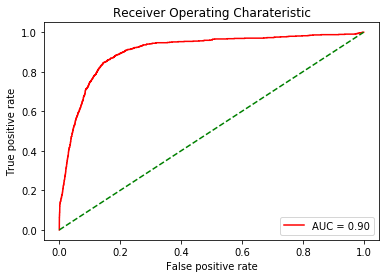

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title("Receiver Operating Charateristic")
plt.plot(fpr, tpr,"red", label="AUC = %0.2f"%roc_auc)
plt.legend(loc = "lower right")

plt.plot([0,1],[0,1], color = "g", linestyle="--")
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.show()

### KNN Classifier using Cross validation

In [68]:
from sklearn.neighbors import KNeighborsClassifier

all_scores = []
for n_neighbors in range(3,9,1):
    knn_clf = KNeighborsClassifier(n_neighbors= n_neighbors)
    all_scores.append((n_neighbors, cross_val_score(knn_clf, X_train, y_train, cv = 10).mean()))
sorted(all_scores, key=lambda x:x[1], reverse = True)[0]

(8, 0.9395771213860558)

### Random Forest Classifier

In [69]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.9545349996166526

In [71]:
from sklearn.metrics import roc_curve,auc
from sklearn import metrics
prob = rf_clf.predict_proba(X_test)
prob_pos = prob[:,1]

fpr, tpr, threshold = roc_curve(y_test, prob_pos)

roc_auc = metrics.auc(fpr,tpr)

print(roc_auc)

0.9385140261286437


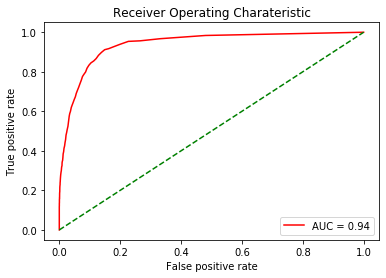

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title("Receiver Operating Charateristic")
plt.plot(fpr, tpr,"red", label="AUC = %0.2f"%roc_auc)
plt.legend(loc = "lower right")

plt.plot([0,1],[0,1], color = "g", linestyle="--")
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.show()

In [73]:
#using GridSearchCV 

from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 25 (5x5) combinations of hyperparameters
    {'n_estimators': [3, 10, 30,100], 'max_features': [2, 4, 6, 8,10]},
    # then try 9 (3×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10,30], 'max_features': [2, 3, 4]},
]

grid_search = GridSearchCV(rf_clf, param_grid, cv=4,
                           scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [74]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [75]:
# Get the best estimator

grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
rf2_clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rf2_clf.fit(X_train, y_train)

y_pred_rf = rf2_clf.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.9521582458023461

### Gradient Boosting Classifier

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)

y_pred_gb = gb_clf.predict(X_test)
accuracy_score(y_test, y_pred_gb)

0.9545349996166526

In [113]:
#using GridSearchCV 

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30,100], 'max_features': [2, 4, 6, 8,10], 'learning_rate':[0.1,0.2,1,10,0.01]}
]

grid_search = GridSearchCV(gb_clf, param_grid, cv=4,
                           scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no...=None,
                                                  presort='aut

In [114]:
# Get the best estimator

grid_search.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=3,
                           max_features=10, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=30,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [115]:
gb_clf2 = GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=3,
                           max_features=10, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=30,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
gb_clf2.fit(X_train, y_train)

y_pred_gb2 = gb_clf2.predict(X_test)
accuracy_score(y_test, y_pred_gb2)

0.9720923100513685

# Exploratory Data Analysis

### College wise induction of players into nfl

In [43]:
players.head()

,nflId,FirstName,LastName,PositionAbbr,EntryYear,DraftRound,DraftNumber,Height,Weight,College
0,79860,John,Stafford,QB,2009,1.0,1.0,"6'03""",220,Georgia
1,71465,Andre,Smith,T,2009,1.0,6.0,"6'04""",325,Alabama
2,80427,Darrius,Heyward-Bey,WR,2009,1.0,7.0,"6'02""",210,Maryland
3,71269,Michael,Crabtree,WR,2009,1.0,10.0,"6'01""",214,Texas Tech
4,71423,Brian,Orakpo,OLB,2009,1.0,13.0,"6'04""",257,Texas


In [44]:
college = players.groupby('College')['nflId'].count().reset_index()
college.sort_values(by='nflId', inplace=True, ascending=False)
college.head(8)

,College,nflId
3,Alabama,39
106,Louisiana State,37
63,Florida,37
66,Florida State,35
166,Ohio State,35
121,Miami,34
203,Southern California,33
46,Clemson,33


### 2 point success rate

In [45]:
two_point = nfl[['posteam','two_point_attempt','two_point_conv_result']]
two_point.head()

,posteam,two_point_attempt,two_point_conv_result
0,PIT,0.0,NaN
1,PIT,0.0,NaN
2,PIT,0.0,NaN
3,PIT,0.0,NaN
4,PIT,0.0,NaN


In [46]:
two_point = nfl[['posteam','two_point_attempt','two_point_conv_result']]
lst = []
for i in two_point.two_point_conv_result:
    if i == 'success':
        lst.append(1)
    else:
        lst.append(0)
two_point['two_point_result'] = lst
two_point.drop('two_point_conv_result', axis=1, inplace = True)
two_point_team_wise = two_point.groupby('posteam')['two_point_attempt','two_point_result'].sum().reset_index()
two_point_team_wise.head()

C:\Users\OYO\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\OYO\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,posteam,two_point_attempt,two_point_result
0,ARI,20.0,7
1,ATL,25.0,9
2,BAL,20.0,11
3,BUF,22.0,12
4,CAR,20.0,10


### Descriptive Statistical Analysis

In [47]:
model_data.describe()

,drive,qtr,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,play_type,fourth_down_converted,def_team,pos_team
count,4.721000e+03,4.721000e+03,4.721000e+03,4.721000e+03,4.721000e+03,4.721000e+03,4.721000e+03,4721.000000,4.721000e+03,4.721000e+03
mean,4.776005e-16,6.517416e-16,1.446277e-16,-4.176564e-17,5.756886e-17,2.297581e-17,1.339769e-15,0.495234,3.695413e-16,-3.897657e-16
std,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,0.500030,1.000106e+00,1.000106e+00
min,-2.066053e+00,-2.049912e+00,-1.598148e+00,-1.256560e+00,-1.098224e+00,-1.000409e+00,-7.553315e-01,0.000000,-1.626594e+00,-1.615079e+00
25%,-6.949383e-01,-1.121602e+00,-7.805922e-01,-8.455030e-01,-8.573316e-01,-8.623551e-01,-7.553315e-01,0.000000,-9.471436e-01,-9.427416e-01
50%,2.648421e-01,7.350190e-01,-8.456673e-03,-2.676970e-01,-3.514572e-01,-4.184736e-01,-7.553315e-01,0.000000,2.350023e-02,-7.830749e-02
75%,8.132881e-01,7.350190e-01,6.728394e-01,7.832119e-01,7.084699e-01,7.636125e-01,1.323922e+00,1.000000,8.970796e-01,8.821748e-01
max,2.458626e+00,1.663329e+00,2.852987e+00,2.233544e+00,2.515164e+00,2.409713e+00,1.323922e+00,1.000000,1.673595e+00,1.650561e+00


### Mean weight by Position

In [118]:
players_weight = players.groupby('PositionAbbr')['Weight'].mean().reset_index()
players_weight.sort_values(by='Weight', ascending=False,inplace=True)
players_weight.head()

,PositionAbbr,Weight
19,T,317.252336
13,NT,316.407407
7,G,314.103774
4,DT,307.616822
0,C,306.309091


### Most commonly occurring penalty types

In [130]:
penalty_type = nfl['penalty_type'].value_counts()
penalty_type.head(10)

Offensive Holding                6250
False Start                      5793
Defensive Pass Interference      2225
Unnecessary Roughness            1794
Defensive Holding                1731
Defensive Offside                1659
Delay of Game                    1290
Illegal Block Above the Waist    1236
Neutral Zone Infraction          1112
Roughing the Passer               903
Name: penalty_type, dtype: int64